In [238]:
# Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, ConfusionMatrixDisplay

# Import Dataset

In [239]:
# Reading and importig the dataset with column names
df = pd.read_csv('data.csv')

In [240]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Preprocessing

In [241]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [242]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [244]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Splitting of dataset according to categorical and numerical features

In [245]:
# getting numerical columns using their dtypes
numerical_columns = [df.columns[i] for i in range(len(df.dtypes)) if (df.dtypes[i]=='int64' or df.dtypes[i]=='float64')]

In [246]:
numerical_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [247]:
# getting categorical columns using the dtypes
nonnumerical_columns = [df.columns[i] for i in range(len(df.columns)) if (df.columns[i] not in numerical_columns)]

In [248]:
nonnumerical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Using numerical attributes only

In [249]:
df_nn = df[numerical_columns]

In [250]:
df_nn

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


# Splitting into training and testing dataset

In [251]:
# Shuffling of data
df_nn = df_nn.sample(frac=1)
df_nn

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
996,997,20,NaN,10659,5,6,1961,1961,0.0,915,...,0,319,0,0,0,0,0,1,2006,136500
650,651,60,65.0,8125,7,6,2007,2007,NaN,0,...,0,0,0,0,0,0,0,5,2008,205950
126,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
38,39,20,68.0,7922,5,7,1953,2007,0.0,731,...,0,52,0,0,0,0,0,1,2010,109000
508,509,70,60.0,9600,7,9,1928,2005,0.0,141,...,0,0,116,0,0,0,0,10,2008,161000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,60,120.0,15611,8,5,2006,2006,0.0,0,...,0,51,0,0,0,0,0,7,2006,233230
72,73,60,74.0,10141,7,5,1998,1998,40.0,0,...,0,94,0,0,291,0,0,12,2009,185000
879,880,20,NaN,7000,5,8,1978,2005,90.0,646,...,0,0,0,0,0,0,0,7,2009,136500
1189,1190,60,60.0,7500,7,5,1999,1999,0.0,0,...,140,60,0,0,0,0,0,6,2010,189000


In [252]:
# splitting of training and testing data
# 70% => training data and 30% => testing data
separating_index = int(len(df_nn)*0.7)
train_data_nn = df_nn[:separating_index]
test_data_nn = df_nn[separating_index:]

# For numerical Training Data

In [253]:
train_data_nn

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
996,997,20,NaN,10659,5,6,1961,1961,0.0,915,...,0,319,0,0,0,0,0,1,2006,136500
650,651,60,65.0,8125,7,6,2007,2007,NaN,0,...,0,0,0,0,0,0,0,5,2008,205950
126,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
38,39,20,68.0,7922,5,7,1953,2007,0.0,731,...,0,52,0,0,0,0,0,1,2010,109000
508,509,70,60.0,9600,7,9,1928,2005,0.0,141,...,0,0,116,0,0,0,0,10,2008,161000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1100,20,82.0,11880,7,5,1978,1978,206.0,704,...,0,0,0,0,0,0,0,4,2009,157000
950,951,20,60.0,7200,5,8,1950,2002,0.0,398,...,194,0,0,0,0,0,0,7,2007,129000
463,464,70,74.0,11988,6,7,1934,1995,0.0,326,...,0,0,0,0,0,0,0,8,2008,188700
1035,1036,20,NaN,11500,4,3,1957,1957,0.0,0,...,186,0,0,0,0,0,0,1,2009,84000


# Data Preprocessing

In [254]:
# checking for null or NaN values
train_data_nn.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      186
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       50
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Going with imputation using mean values of each feature column

In [255]:
# imputation with mean values of each feature column
for f in train_data_nn.columns[1:]:
    # getting the mean value of the feature column
    replace_mean = train_data_nn[f].mean()    
    # replacing the null values with mean value
    train_data_nn[f] = train_data_nn[f].fillna(replace_mean)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\1532112943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_nn[f] = train_data_nn[f].fillna(replace_mean)


In [256]:
# checking for null or NaN values
train_data_nn.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [257]:
# Checking and deleting duplicate values
if train_data_nn.duplicated().sum() > 0:    
    # getting the indexes of the duplicate values
    droplist=train_data_nn.loc[train_data_nn.duplicated()==True].index.tolist()
    # Deleting the duplicate values
    train_data_nn.drop(droplist,axis=0,inplace=True)

In [258]:
# check unique values for every features
for i in train_data_nn.columns:
    print("For", i)
    print(train_data_nn[i].unique())

For Id
[ 997  651  127 ...  464 1036    3]
For MSSubClass
[ 20  60 120  70  30  50  80 190 180 160  90  75  45  85  40]
For LotFrontage
[ 70.0742515  65.         68.         60.         80.         52.
  85.         47.        129.         55.         71.         72.
  62.         70.         75.         90.         21.         44.
  88.         56.         69.         53.        134.         24.
  61.         73.         58.         48.         50.         98.
  97.         63.        110.        100.         64.         40.
 107.         74.         57.         43.         91.        124.
  32.         89.         96.         59.        105.         67.
  78.        140.        108.         76.         45.         54.
  92.         79.         86.        104.         36.         51.
  42.         99.         81.        103.         95.         87.
  30.         38.        168.         66.         49.        114.
 102.         83.        152.         82.        174.         41.
  33. 

# Feature Selection and Feature Pruning

In [259]:
# calculating correlation between the features
cormat = train_data_nn.corr()
cormat = round(cormat, 2)

In [260]:
cormat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.03,-0.02,-0.03,-0.03,0.01,-0.01,-0.03,-0.06,-0.02,...,-0.02,0.01,-0.02,-0.02,0.01,0.07,-0.00,0.01,-0.01,-0.02
MSSubClass,0.03,1.00,-0.36,-0.23,0.01,-0.04,0.04,0.05,0.01,-0.10,...,-0.03,-0.01,0.01,-0.05,-0.02,0.01,-0.01,-0.03,-0.04,-0.10
LotFrontage,-0.02,-0.36,1.00,0.34,0.23,-0.03,0.09,0.08,0.16,0.22,...,0.07,0.12,0.04,0.04,0.03,0.21,0.00,0.01,0.03,0.31
LotArea,-0.03,-0.23,0.34,1.00,0.12,-0.00,0.00,0.05,0.12,0.22,...,0.16,0.13,-0.01,0.03,0.05,0.11,0.04,0.00,-0.06,0.26
OverallQual,-0.03,0.01,0.23,0.12,1.00,-0.12,0.59,0.54,0.40,0.23,...,0.22,0.29,-0.11,0.04,0.06,0.08,-0.03,0.03,-0.03,0.80
OverallCond,0.01,-0.04,-0.03,-0.00,-0.12,1.00,-0.40,0.07,-0.14,-0.05,...,0.03,-0.07,0.05,0.04,0.06,-0.00,0.08,-0.02,0.05,-0.10
YearBuilt,-0.01,0.04,0.09,0.00,0.59,-0.40,1.00,0.60,0.32,0.23,...,0.19,0.22,-0.39,0.04,-0.09,0.01,-0.03,0.00,-0.00,0.52
YearRemodAdd,-0.03,0.05,0.08,0.05,0.54,0.07,0.60,1.00,0.19,0.13,...,0.18,0.22,-0.19,0.07,-0.09,0.01,0.00,-0.00,0.04,0.50
MasVnrArea,-0.06,0.01,0.16,0.12,0.40,-0.14,0.32,0.19,1.00,0.23,...,0.14,0.12,-0.10,0.01,0.02,0.01,-0.03,-0.03,0.02,0.46
BsmtFinSF1,-0.02,-0.10,0.22,0.22,0.23,-0.05,0.23,0.13,0.23,1.00,...,0.18,0.13,-0.08,0.04,0.06,0.16,0.00,-0.03,0.01,0.36


In [261]:
# taking 70% correlation as our threshold and selecting the features
features = []

for index, ec in enumerate(cormat.SalePrice):
    if ec >= 0.65:
        features.append(train_data_nn.columns[index])

In [262]:
features

['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']

In [263]:
train_data_nn = train_data_nn[features]

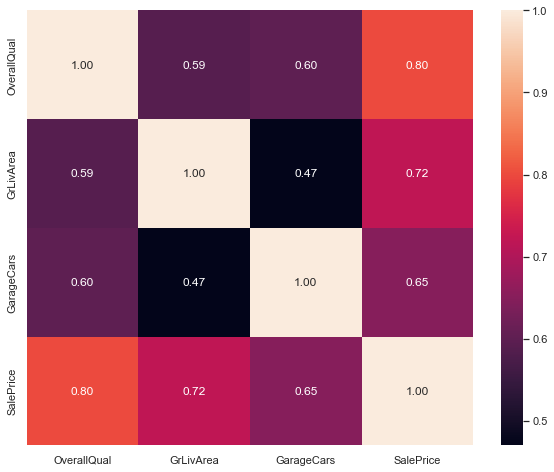

In [264]:
# calculating correlation between the features
cormat = train_data_nn.corr()
cormat = round(cormat, 2)
# Displaying the heatmap of correlation between the features
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.heatmap(cormat, annot = True, fmt='.2f')


In [265]:
train_data_nn

,OverallQual,GrLivArea,GarageCars,SalePrice
996,5,1050,1,136500
650,7,1665,2,205950
126,6,958,2,128000
38,5,1057,1,109000
508,7,1378,2,161000
...,...,...,...,...
1099,7,1601,2,157000
950,5,864,2,129000
463,6,1660,1,188700
1035,4,845,1,84000


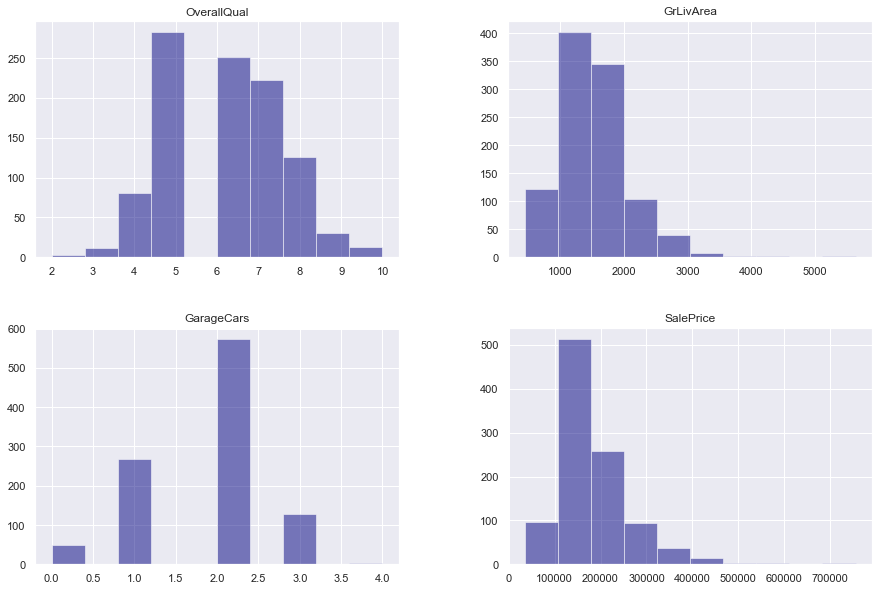

In [266]:
# histogram showing relations between the feature set of whole train_data
sns.set(style="darkgrid")
train_data_nn.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

# Data separation into dependent and independent variable

In [267]:
# separating the dependent and independent variable as target and dataset
y_train_nn = train_data_nn['SalePrice']
X_train_nn = train_data_nn[features[: -1]]

# Measure of Central Tendency For Each Feature

In [268]:
# Normal distribution plot
def Normal_distribution(dataset):
    dataset = np.sort(dataset)
    mean = np.mean(dataset)
    std = np.std(dataset)
    # Normal Distribution 
    dataset_values = []
    for value in dataset:
        fx = (1/ (std*math.sqrt(2*np.pi))) * pow(2.71828, ((-1/2) * (((value - mean)/std)**2)))
        dataset_values.append(fx)
    plt.plot(dataset, dataset_values)
    plt.show()

For Feature  OverallQual


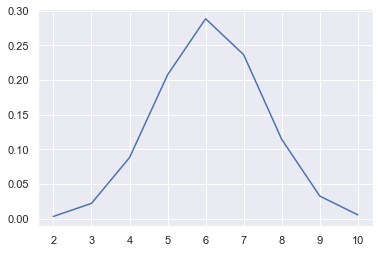

For Feature  GrLivArea


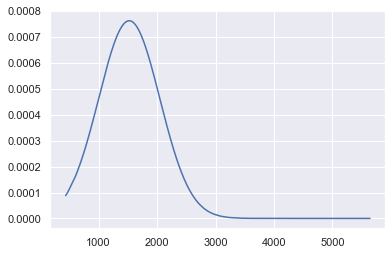

For Feature  GarageCars


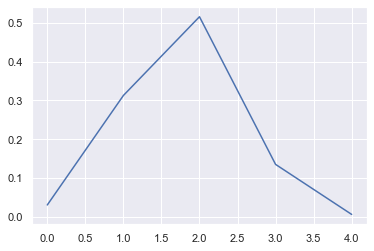

In [269]:
# Plotting Normal distribution for each feature in X_train
for ef in features[: -1]:
    print("For Feature ", ef)
    Normal_distribution(X_train_nn[ef])

# Data Normalization

In [270]:
# Data normalization
normalization_values_nn = []
def normalization_data(train):
    min_value = min(train)
    max_value = max(train)
    normalization_values_nn.append([min_value, max_value])
    
    new_data = []
    for ea in train:
        new_value = (ea - min_value)/(max_value - min_value)
        new_data.append(round(new_value, 2))
    return new_data

In [271]:
# Normalizing the dataset
for i in X_train_nn.columns:
    X_train_nn[i] = normalization_data(X_train_nn[i])
# Dataset after normalization
X_train_nn

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\3746832073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_nn[i] = normalization_data(X_train_nn[i])


,OverallQual,GrLivArea,GarageCars
996,0.38,0.12,0.25
650,0.62,0.24,0.50
126,0.50,0.10,0.50
38,0.38,0.12,0.25
508,0.62,0.18,0.50
...,...,...,...
1099,0.62,0.22,0.50
950,0.38,0.08,0.50
463,0.50,0.23,0.25
1035,0.25,0.08,0.25


# For Test Data of Numerical attributes

In [272]:
test_data_nn

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1056,1057,120,43.0,7052,7,5,2005,2005,240.0,659,...,192,36,0,0,0,0,0,6,2006,185850
733,734,20,80.0,10000,5,6,1961,1983,0.0,594,...,165,0,0,0,0,0,400,3,2009,131400
1247,1248,80,NaN,12328,6,5,1976,1976,335.0,539,...,0,0,0,0,0,0,0,5,2010,169900
1028,1029,50,79.0,9492,5,5,1941,1950,0.0,368,...,0,0,0,0,0,0,0,4,2007,105000
743,744,80,70.0,12886,5,6,1963,1999,0.0,444,...,302,0,0,0,100,0,0,10,2009,175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,60,120.0,15611,8,5,2006,2006,0.0,0,...,0,51,0,0,0,0,0,7,2006,233230
72,73,60,74.0,10141,7,5,1998,1998,40.0,0,...,0,94,0,0,291,0,0,12,2009,185000
879,880,20,NaN,7000,5,8,1978,2005,90.0,646,...,0,0,0,0,0,0,0,7,2009,136500
1189,1190,60,60.0,7500,7,5,1999,1999,0.0,0,...,140,60,0,0,0,0,0,6,2010,189000


In [273]:
test_data_nn = test_data_nn[features]

In [274]:
test_data_nn

,OverallQual,GrLivArea,GarageCars,SalePrice
1056,7,1364,2,185850
733,5,1144,1,131400
1247,6,1034,3,169900
1028,5,1376,1,105000
743,5,1464,2,175000
...,...,...,...,...
290,8,1919,2,233230
72,7,1718,2,185000
879,5,864,1,136500
1189,7,1804,2,189000


In [275]:
isnull_flag = False
isnull_list = test_data_nn.isnull().sum().tolist()
for ev in isnull_list:
    if ev>0: 
        isnull_flag = True
        break
    

In [276]:
# checking and deleting for null or NaN values
if isnull_flag:    
    test_data_nn.dropna(axis=0)

In [277]:
# Checking and deleting duplicate values
if test_data_nn.duplicated().sum() > 0:    
    # getting the indexes of the duplicate values
    droplist=test_data_nn.loc[test_data_nn.duplicated()==True].index.tolist()
    # Deleting the duplicate values
    test_data_nn.drop(droplist,axis=0,inplace=True)

In [278]:
# check unique values for every features
for i in test_data_nn.columns:
    print("For", i)
    print(test_data_nn[i].unique())

For OverallQual
[ 7  5  6  3  4  9  8 10  2  1]
For GrLivArea
[1364 1144 1034 1376 1464  864 1536 1489 1717 2172 1196 1065 1738 1252
  792  960  894 1044 1294 1123 1702 1744  848 2158 1215 1895 1950 1726
 1348 2073  969  866 1811 2240  951 1701 1530 2414 1792 1268 1301 1848
 2554 1689 1188 1712 1232 1686 1425 1296 1961 1194 1180 1316 1111 1431
 3395  988  816 2054 1657  773 1824 1724  835  838 1558 1214 1200  899
 1141 2260 1576  958  923 1320  904 1605 1478 1140 1225 1432  970 1253
  990 1820 1422 1768 1155 1933 1078  833 1383 2358 1836 2263 3279 2872
 1456  918  924 1080  999 1700 1349 1040 1949  913 1507 2622 1392  987
 1567 1026 1128 1370 2775 1368 1602 1586 1158 1924 1844 1287 1626 1632
 1362 1680 1285 1987 2473  914 2098 1261 2046  720  708  804 3082 2364
 1935  968 1276 1656 1482  935 1236 1120 2320  875 1012 1774 2210 1939
 1343  902 1720 1761 1698  672 1212 1112  912 1929 1962  840 1694 2526
  693 1779 2290 1428 1339 1707 1969 1262 1733 1509  789 1714 1148 1244
 1954 1122 1088

# Data separation into dependent and independent variable

In [279]:
# separating the dependent and independent variable as target and dataset
y_test_nn = test_data_nn['SalePrice']
X_test_nn = test_data_nn[features[: -1]]

In [280]:
y_test_nn

1056    185850
733     131400
1247    169900
1028    105000
743     175000
         ...  
290     233230
72      185000
879     136500
1189    189000
256     207500
Name: SalePrice, Length: 439, dtype: int64

In [281]:
X_test_nn

,OverallQual,GrLivArea,GarageCars
1056,7,1364,2
733,5,1144,1
1247,6,1034,3
1028,5,1376,1
743,5,1464,2
...,...,...,...
290,8,1919,2
72,7,1718,2
879,5,864,1
1189,7,1804,2


In [282]:
def normalization_data2(test, values):
    min_value = values[0]
    max_value = values[1]    
    
    new_data = []
    for ea in test:
        new_value = (ea - min_value)/(max_value - min_value)
        new_data.append(round(new_value, 2))
    return new_data

In [283]:
count = 0
# Normalizing the dataset
for i in X_test_nn.columns:
    X_test_nn[i] = normalization_data2(X_test_nn[i], normalization_values_nn[count])
    count += 1
# Dataset after normalization
X_test_nn

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\1589369527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_nn[i] = normalization_data2(X_test_nn[i], normalization_values_nn[count])


,OverallQual,GrLivArea,GarageCars
1056,0.62,0.18,0.50
733,0.38,0.14,0.25
1247,0.50,0.11,0.75
1028,0.38,0.18,0.25
743,0.38,0.20,0.50
...,...,...,...
290,0.75,0.28,0.50
72,0.62,0.25,0.50
879,0.38,0.08,0.25
1189,0.62,0.26,0.50


# Data Modeling

Linear Regression & SVM

In [284]:
from sklearn import linear_model, metrics, svm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression

In [285]:
# create linear regression object
reg = linear_model.LinearRegression()

In [286]:
# train the model using the training sets
reg.fit(X_train_nn, y_train_nn)

LinearRegression()

In [287]:
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [221361.55526829 275298.7078862   88479.94484284]


In [288]:
# predicted output of the training dataset
y_train_pred_nn = reg.predict(X_train_nn)
# predicted output of the test dataset
y_test_pred_nn = reg.predict(X_test_nn)

In [289]:
# Mean Squared Error
print("Mean Squared Error:",mean_squared_error(y_test_nn,y_test_pred_nn))

Mean Squared Error: 1773700461.308778


In [290]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nn,y_test_pred_nn)))

RMSE 42115.32335514923


In [291]:
# Mean Absolute Error
print("Mean Absolute Error:",mean_absolute_error(y_test_nn,y_test_pred_nn))

Mean Absolute Error: 28198.40237195548


# Support Vector Machine

In [292]:
# creating SVM classifier
clf = svm.SVC()

In [293]:
# fitting data to classifier
clf.fit(X_train_nn, y_train_nn)

SVC()

In [294]:
# predicted output of the training dataset
y_train_pred_nn = clf.predict(X_train_nn)
# predicted output of the test dataset
y_test_pred_nn = clf.predict(X_test_nn)

In [295]:
# train accuracy score
accuracy_score(y_train_nn, y_train_pred_nn)

0.03721841332027424

In [296]:
# test accuracy score
accuracy_score(y_test_nn, y_test_pred_nn)

0.011389521640091117

In [297]:
# Mean Squared Error
print("Mean Squared Error:",mean_squared_error(y_test_nn,y_test_pred_nn))

Mean Squared Error: 2777757523.3234625


In [298]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nn,y_test_pred_nn)))

RMSE 52704.435518497514


In [299]:
# Mean Absolute Error
print("Mean Absolute Error:",mean_absolute_error(y_test_nn,y_test_pred_nn))

Mean Absolute Error: 35019.83826879271


# Using non-numerical(categorical) attributes only

In [300]:
nonnumerical_columns.append('SalePrice')

In [301]:
df_nn = df[nonnumerical_columns]

In [302]:
df_nn

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


# Splitting into training and testing dataset

In [303]:
# Shuffling of data
df_nn = df_nn.sample(frac=1)
df_nn

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
708,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,179540
1089,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,197000
978,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,110000
1351,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,171000
818,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,147000
444,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,210000
378,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,394432
607,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,225000


In [304]:
# splitting of training and testing data
# 70% => training data and 30% => testing data
separating_index = int(len(df_nn)*0.7)
train_data_nn = df_nn[:separating_index]
test_data_nn = df_nn[separating_index:]

# For non-numerical(categorical) Training Data

In [305]:
train_data_nn

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
708,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,179540
1089,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,197000
978,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,110000
1351,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,171000
818,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,127000
43,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,130250
686,FV,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,227875
497,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Unf,TA,TA,N,NaN,GdPrv,NaN,WD,Normal,184000


# Data Preprocessing

In [306]:
# checking for null or NaN values
train_data_nn.isnull().sum()

MSZoning            0
Street              0
Alley             957
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           24
BsmtCond           24
BsmtExposure       25
BsmtFinType1       24
BsmtFinType2       25
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       488
GarageType         58
GarageFinish       58
GarageQual         58
GarageCond         58
PavedDrive          0
PoolQC           1017
Fence             823
MiscFeature       980
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

Going with imputation using mean values of each feature column

In [307]:
# deletion of missing values columns
isnull_flag = False
isnull_list = test_data_nn.isnull().sum().tolist()
for ev in isnull_list:
    if ev>0: 
        isnull_flag = True
        break

if isnull_flag:    
    train_data_nn.dropna(axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\2826472684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_nn.dropna(axis=1, inplace=True)


In [308]:
# checking for null or NaN values
train_data_nn.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [309]:
# Checking and deleting duplicate values
if train_data_nn.duplicated().sum() > 0:    
    # getting the indexes of the duplicate values
    droplist=train_data_nn.loc[train_data_nn.duplicated()==True].index.tolist()
    # Deleting the duplicate values
    train_data_nn.drop(droplist,axis=0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\2567986393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_nn.drop(droplist,axis=0,inplace=True)


In [310]:
# check unique values for every features
for i in train_data_nn.columns:
    print("For", i)
    print(train_data_nn[i].unique())

For MSZoning
['RL' 'FV' 'RM' 'RH' 'C (all)']
For Street
['Pave' 'Grvl']
For LotShape
['IR1' 'Reg' 'IR2' 'IR3']
For LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
For Utilities
['AllPub' 'NoSeWa']
For LotConfig
['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
For LandSlope
['Gtl' 'Mod' 'Sev']
For Neighborhood
['Gilbert' 'Somerst' 'Edwards' 'NAmes' 'ClearCr' 'CollgCr' 'NoRidge'
 'NridgHt' 'OldTown' 'NWAmes' 'BrkSide' 'SawyerW' 'SWISU' 'BrDale'
 'Sawyer' 'IDOTRR' 'Timber' 'Crawfor' 'Mitchel' 'StoneBr' 'MeadowV'
 'NPkVill' 'Veenker' 'Blueste' 'Blmngtn']
For Condition1
['Norm' 'Artery' 'PosN' 'Feedr' 'RRAn' 'RRAe' 'PosA' 'RRNe' 'RRNn']
For Condition2
['Norm' 'Artery' 'RRNn' 'PosA' 'Feedr' 'RRAn' 'PosN']
For BldgType
['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
For HouseStyle
['2Story' '1Story' 'SLvl' '1.5Fin' '2.5Unf' 'SFoyer' '2.5Fin' '1.5Unf']
For RoofStyle
['Hip' 'Gable' 'Mansard' 'Gambrel' 'Flat' 'Shed']
For RoofMatl
['CompShg' 'Roll' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran']
For Exterior1st
['VinylSd' '

# Converting categorical values to numerical values

In [311]:
# setting encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()

In [312]:
# categorical to numerical converter
for cl in train_data_nn.columns:
    label_encoder.fit(train_data_nn[cl])
    train_data_nn[cl] = label_encoder.transform(train_data_nn[cl])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\2406689664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_nn[cl] = label_encoder.transform(train_data_nn[cl])


In [313]:
train_data_nn.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
708,3,1,0,3,0,4,0,8,2,2,...,2,1,0,1,2,5,2,6,5,275
1089,1,1,0,3,0,4,0,21,2,2,...,2,1,0,1,2,5,2,8,4,316
978,3,1,3,0,0,4,1,7,2,2,...,1,1,0,1,3,5,2,8,0,80
1351,3,1,0,3,0,4,0,12,2,2,...,1,1,0,1,3,5,2,8,4,247
818,3,1,3,3,0,4,0,4,2,2,...,1,1,2,1,3,5,2,8,4,207


# Feature Selection and Feature Pruning

In [314]:
# calculating correlation between the features
cormat = train_data_nn.corr()
cormat = round(cormat, 2)

In [315]:
cormat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
MSZoning,1.00,0.18,0.07,-0.01,-0.00,-0.01,-0.02,-0.25,-0.04,0.07,...,-0.22,0.05,0.14,-0.07,0.13,-0.10,-0.13,0.09,0.03,-0.24
Street,0.18,1.00,-0.00,0.15,0.00,0.01,-0.19,-0.01,0.00,0.00,...,0.03,0.01,-0.03,0.05,0.00,-0.01,0.06,0.04,0.02,0.04
LotShape,0.07,-0.00,1.00,0.06,-0.04,0.23,-0.10,-0.02,-0.10,-0.04,...,-0.16,0.08,0.11,-0.13,0.17,-0.06,-0.11,0.00,-0.04,-0.33
LandContour,-0.01,0.15,0.06,1.00,0.01,-0.05,-0.35,0.00,0.04,-0.04,...,0.05,0.03,-0.08,0.10,0.01,0.04,0.13,-0.04,0.03,0.01
Utilities,-0.00,0.00,-0.04,0.01,1.00,-0.04,-0.01,0.06,-0.00,-0.00,...,-0.02,-0.00,0.01,0.01,-0.01,0.01,0.01,-0.15,-0.11,-0.02
LotConfig,-0.01,0.01,0.23,-0.05,-0.04,1.00,-0.01,-0.03,0.00,0.03,...,0.00,0.04,-0.03,-0.01,-0.01,-0.01,-0.04,0.03,0.04,-0.10
LandSlope,-0.02,-0.19,-0.10,-0.35,-0.01,-0.01,1.00,-0.08,-0.02,-0.01,...,-0.02,0.00,0.04,0.03,0.01,-0.09,-0.03,0.06,-0.06,0.09
Neighborhood,-0.25,-0.01,-0.02,0.00,0.06,-0.03,-0.08,1.00,-0.03,0.04,...,0.04,-0.00,-0.03,0.04,-0.09,0.02,0.02,-0.05,0.00,0.16
Condition1,-0.04,0.00,-0.10,0.04,-0.00,0.00,-0.02,-0.03,1.00,-0.11,...,0.08,0.00,-0.12,0.02,-0.07,0.01,0.08,-0.00,0.06,0.11
Condition2,0.07,0.00,-0.04,-0.04,-0.00,0.03,-0.01,0.04,-0.11,1.00,...,-0.01,-0.00,0.00,-0.02,-0.04,0.01,0.03,0.01,0.03,0.00


In [316]:
# taking 15% correlation as our threshold and selecting the features
features = []

for index, ec in enumerate(cormat.SalePrice):
    if ec >= 0.15:
        features.append(train_data_nn.columns[index])

In [317]:
features

['Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Foundation',
 'CentralAir',
 'PavedDrive',
 'SaleCondition',
 'SalePrice']

In [318]:
train_data_nn = train_data_nn[features]

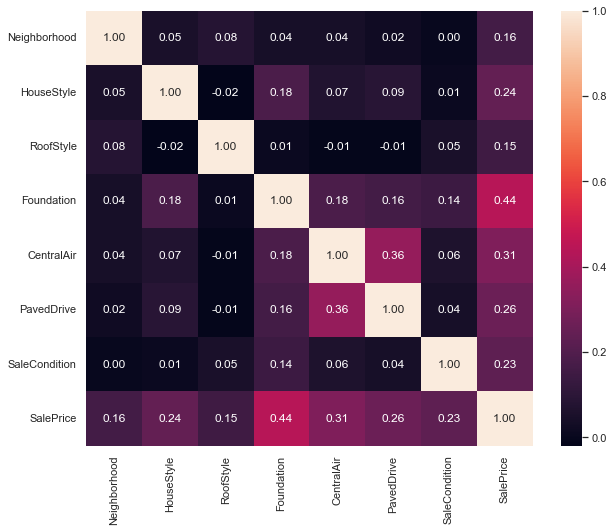

In [319]:
# calculating correlation between the features
cormat = train_data_nn.corr()
cormat = round(cormat, 2)
# Displaying the heatmap of correlation between the features
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.heatmap(cormat, annot = True, fmt='.2f')


In [320]:
train_data_nn

,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition,SalePrice
708,8,5,3,2,1,2,5,275
1089,21,2,1,2,1,2,4,316
978,7,2,1,1,1,2,0,80
1351,12,5,1,1,1,2,4,247
818,4,7,1,1,1,2,4,207
...,...,...,...,...,...,...,...,...
194,5,2,3,1,1,2,4,121
43,5,2,3,1,1,2,4,131
686,21,5,1,2,1,2,5,371
497,3,0,1,2,1,0,4,287


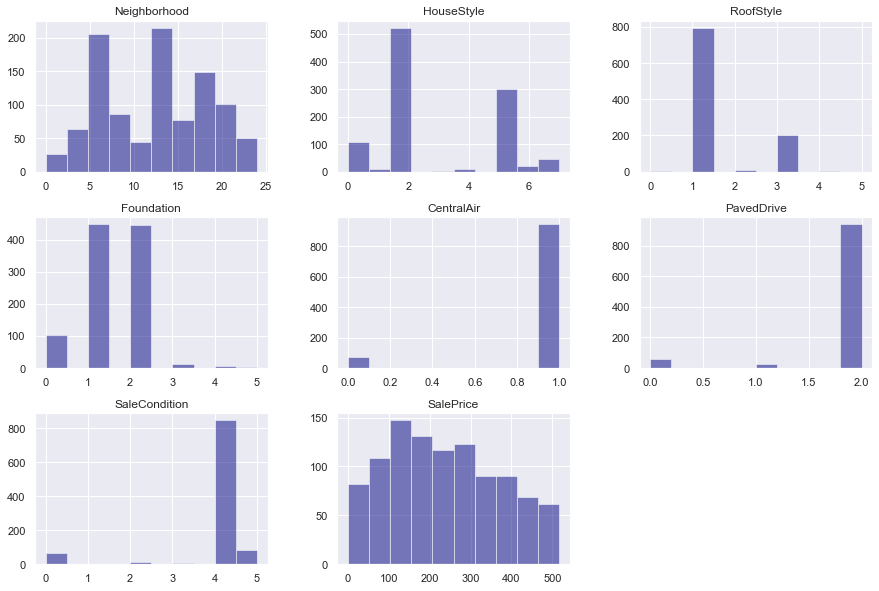

In [321]:
# histogram showing relations between the feature set of whole train_data
sns.set(style="darkgrid")
train_data_nn.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

# Data separation into dependent and independent variable

In [322]:
# separating the dependent and independent variable as target and dataset
y_train_nn = train_data_nn['SalePrice']
X_train_nn = train_data_nn[features[: -1]]

# Measure of Central Tendency For Each Feature

In [323]:
# Normal distribution plot
def Normal_distribution(dataset):
    dataset = np.sort(dataset)
    mean = np.mean(dataset)
    std = np.std(dataset)
    # Normal Distribution 
    dataset_values = []
    for value in dataset:
        fx = (1/ (std*math.sqrt(2*np.pi))) * pow(2.71828, ((-1/2) * (((value - mean)/std)**2)))
        dataset_values.append(fx)
    plt.plot(dataset, dataset_values)
    plt.show()

For Feature  Neighborhood


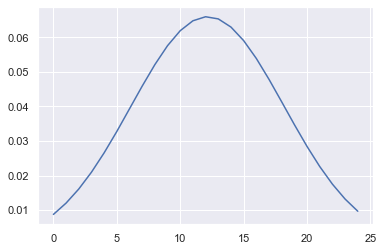

For Feature  HouseStyle


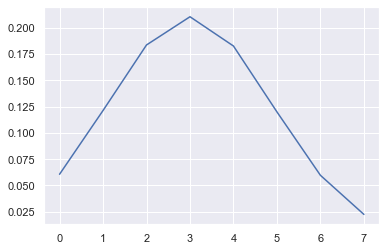

For Feature  RoofStyle


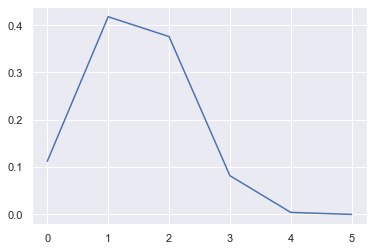

For Feature  Foundation


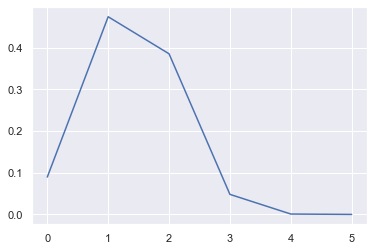

For Feature  CentralAir


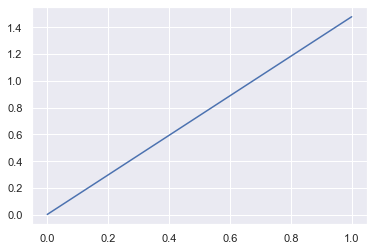

For Feature  PavedDrive


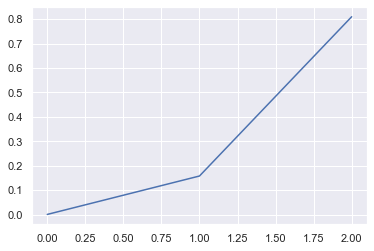

For Feature  SaleCondition


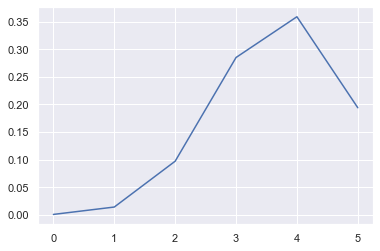

In [324]:
# Plotting Normal distribution for each feature in X_train
for ef in features[: -1]:
    print("For Feature ", ef)
    Normal_distribution(X_train_nn[ef])

# Data Normalization

In [326]:
# Normalizing the dataset
for i in X_train_nn.columns:
    X_train_nn[i] = normalization_data(X_train_nn[i])
# Dataset after normalization
X_train_nn

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\3746832073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_nn[i] = normalization_data(X_train_nn[i])


,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition
708,0.33,0.71,0.6,0.4,1.0,1.0,1.0
1089,0.88,0.29,0.2,0.4,1.0,1.0,0.8
978,0.29,0.29,0.2,0.2,1.0,1.0,0.0
1351,0.50,0.71,0.2,0.2,1.0,1.0,0.8
818,0.17,1.00,0.2,0.2,1.0,1.0,0.8
...,...,...,...,...,...,...,...
194,0.21,0.29,0.6,0.2,1.0,1.0,0.8
43,0.21,0.29,0.6,0.2,1.0,1.0,0.8
686,0.88,0.71,0.2,0.4,1.0,1.0,1.0
497,0.12,0.00,0.2,0.4,1.0,0.0,0.8


# For Test Data of Non-Numerical attributes

In [327]:
test_data_nn

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
1102,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,RFn,TA,TA,Y,NaN,MnWw,NaN,WD,Family,135000
1158,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,ConLD,Partial,235128
211,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,186000
1438,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,149700
854,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,147000
444,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,210000
378,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,394432
607,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,225000


In [328]:
test_data_nn = test_data_nn[features]

In [329]:
test_data_nn

,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition,SalePrice
1102,NAmes,1Story,Gable,CBlock,Y,Y,Family,135000
1158,Somerst,1Story,Gable,PConc,Y,Y,Partial,235128
211,Edwards,1Story,Gable,PConc,Y,Y,Normal,186000
1438,OldTown,1Story,Gable,CBlock,Y,Y,Normal,149700
854,Sawyer,1Story,Hip,CBlock,Y,Y,Abnorml,170000
...,...,...,...,...,...,...,...,...
1085,SawyerW,SFoyer,Gable,PConc,Y,Y,Normal,147000
444,CollgCr,2Story,Gable,PConc,Y,Y,Normal,210000
378,StoneBr,1Story,Hip,PConc,Y,Y,Partial,394432
607,Edwards,2Story,Gable,CBlock,Y,Y,Normal,225000


In [330]:
# deletion of missing values columns
isnull_flag = False
isnull_list = test_data_nn.isnull().sum().tolist()
for ev in isnull_list:
    if ev>0: 
        isnull_flag = True
        break

if isnull_flag:    
    test_data_nn.dropna(axis=1, inplace=True)

In [331]:
# Checking and deleting duplicate values
if test_data_nn.duplicated().sum() > 0:    
    # getting the indexes of the duplicate values
    droplist=test_data_nn.loc[test_data_nn.duplicated()==True].index.tolist()
    # Deleting the duplicate values
    test_data_nn.drop(droplist,axis=0,inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\1959505319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_nn.drop(droplist,axis=0,inplace=True)


In [332]:
test_data_nn.isnull().sum()

Neighborhood     0
HouseStyle       0
RoofStyle        0
Foundation       0
CentralAir       0
PavedDrive       0
SaleCondition    0
SalePrice        0
dtype: int64

In [333]:
# Converting categorical values to numerical values

# setting encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()


In [334]:
features[: -1]

['Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Foundation',
 'CentralAir',
 'PavedDrive',
 'SaleCondition']

In [335]:
# categorical to numerical converter
for cl in features[: -1]:
    label_encoder.fit(test_data_nn[cl])
    test_data_nn[cl] = label_encoder.transform(test_data_nn[cl])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\1509525296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_nn[cl] = label_encoder.transform(test_data_nn[cl])


In [336]:
test_data_nn.head()

,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition,SalePrice
1102,11,2,1,1,1,2,2,135000
1158,20,2,1,2,1,2,4,235128
211,6,2,1,2,1,2,3,186000
1438,16,2,1,1,1,2,3,149700
854,18,2,3,1,1,2,0,170000


# Data separation into dependent and independent variable

In [337]:
# separating the dependent and independent variable as target and dataset
y_test_nn = test_data_nn['SalePrice']
X_test_nn = test_data_nn[features[: -1]]

In [338]:
y_test_nn

1102    135000
1158    235128
211     186000
1438    149700
854     170000
         ...  
1085    147000
444     210000
378     394432
607     225000
1276    162000
Name: SalePrice, Length: 431, dtype: int64

In [339]:
X_test_nn

,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition
1102,11,2,1,1,1,2,2
1158,20,2,1,2,1,2,4
211,6,2,1,2,1,2,3
1438,16,2,1,1,1,2,3
854,18,2,3,1,1,2,0
...,...,...,...,...,...,...,...
1085,19,6,1,2,1,2,3
444,4,5,1,2,1,2,3
378,21,2,3,2,1,2,4
607,6,5,1,1,1,2,3


# Data Normalization

In [340]:
count = 0
# Normalizing the dataset
for i in X_test_nn.columns:
    X_test_nn[i] = normalization_data2(X_test_nn[i], normalization_values_nn[count])
    count += 1
# Dataset after normalization
X_test_nn

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\1589369527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_nn[i] = normalization_data2(X_test_nn[i], normalization_values_nn[count])


,Neighborhood,HouseStyle,RoofStyle,Foundation,CentralAir,PavedDrive,SaleCondition
1102,0.46,0.29,0.2,0.2,1.0,1.0,0.4
1158,0.83,0.29,0.2,0.4,1.0,1.0,0.8
211,0.25,0.29,0.2,0.4,1.0,1.0,0.6
1438,0.67,0.29,0.2,0.2,1.0,1.0,0.6
854,0.75,0.29,0.6,0.2,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1085,0.79,0.86,0.2,0.4,1.0,1.0,0.6
444,0.17,0.71,0.2,0.4,1.0,1.0,0.6
378,0.88,0.29,0.6,0.4,1.0,1.0,0.8
607,0.25,0.71,0.2,0.2,1.0,1.0,0.6


# Data Modeling

Linear Regression & SVM

In [341]:
from sklearn import linear_model, metrics, svm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression

In [342]:
# create linear regression object
reg = linear_model.LinearRegression()

In [343]:
# train the model using the training sets
reg.fit(X_train_nn, y_train_nn)

LinearRegression()

In [344]:
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [ 62.18645892  76.23345515 108.99251913 304.30857712  93.48804097
  67.49440167  99.51264831]


In [345]:
# predicted output of the training dataset
y_train_pred_nn = reg.predict(X_train_nn)
# predicted output of the test dataset
y_test_pred_nn = reg.predict(X_test_nn)

In [346]:
# Mean Squared Error
print("Mean Squared Error:",mean_squared_error(y_test_nn,y_test_pred_nn))

Mean Squared Error: 43467795872.65857


In [347]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nn,y_test_pred_nn)))

RMSE 208489.31836585436


In [348]:
# Mean Absolute Error
print("Mean Absolute Error:",mean_absolute_error(y_test_nn,y_test_pred_nn))

Mean Absolute Error: 188715.48548332567


# Support Vector Machine

In [349]:
# creating SVM classifier
clf = svm.SVC()

In [350]:
# fitting data to classifier
clf.fit(X_train_nn, y_train_nn)

SVC()

In [351]:
# predicted output of the training dataset
y_train_pred_nn = clf.predict(X_train_nn)
# predicted output of the test dataset
y_test_pred_nn = clf.predict(X_test_nn)

In [352]:
# train accuracy score
accuracy_score(y_train_nn, y_train_pred_nn)

0.03627450980392157

In [353]:
# test accuracy score
accuracy_score(y_test_nn, y_test_pred_nn)

0.0

In [354]:
# Mean Squared Error
print("Mean Squared Error:",mean_squared_error(y_test_nn,y_test_pred_nn))

Mean Squared Error: 43491878845.70998


In [355]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nn,y_test_pred_nn)))

RMSE 208547.066260137


In [356]:
# Mean Absolute Error
print("Mean Absolute Error:",mean_absolute_error(y_test_nn,y_test_pred_nn))

Mean Absolute Error: 188763.66357308585
